**EXPLORATORY DATA ANALYSIS**

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import plotly.offline as pyo
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report

**UNDERSTAND THE DATA**

In [26]:
titanic=pd.read_excel('/content/titanic data set.xlsx')

In [4]:
#shape is used to obtain dimensions of pandas and numpy type objects
titanic.shape

(418, 12)

In [5]:
#head() method returns the first five rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#tail() methods returns the last five rows
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
#column function is used return the column labels of the given dataframe.
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
#this function is used to return the column labels in the form of list
titanic.columns.values.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
#describe() method is used to returns description of data in dataframe
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
#info() method is used to print information about the data frame
titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

**CHECKING THE MISSING VALUES**

In [11]:
# isnull() function is used to check missing values
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [12]:
#notnull() is used to check the non-missing values
titanic.notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,False,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,True,True,True,True,True,False,True,True,True,True,False,True
414,True,True,True,True,True,True,True,True,True,True,True,True
415,True,True,True,True,True,True,True,True,True,True,False,True
416,True,True,True,True,True,False,True,True,True,True,False,True


In [13]:
#this function is used to check if there is any missing value
titanic.isnull().values.any()

True

In [14]:
#this function is used to check how many values are missing values in data
titanic.isnull().sum().sum()

414

In [15]:
#this function checks the missing variables
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**DROPPING THE DATA**

In [16]:
#this function is used to drop the duplicate rows
titanic.drop_duplicates(inplace=True)

In [17]:
titanic=titanic.drop(titanic.index[[1,2,3]])
print(titanic)

     PassengerId  Survived  Pclass  \
0            892         0       3   
4            896         1       3   
5            897         0       3   
6            898         1       3   
7            899         0       2   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
5                      Svensson, Mr. Johan Cervin    male  14.0      0      0   
6                            Connolly, Miss. Kate  female  30.0      0      0   
7                    Caldwell, Mr. Albert Francis    male  26.0      1      1   
..                                            ...     ...

In [18]:
#this function is used to drop the 2nd to the 10th row
titanic=titanic.drop(titanic.index[range(1,11)])
print(titanic)

     PassengerId  Survived  Pclass  \
0            892         0       3   
14           906         1       1   
15           907         1       2   
16           908         0       2   
17           909         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                                     Kelly, Mr. James    male  34.5      0   
14   Chaffee, Mrs. Herbert Fuller (Carrie Constance...  female  47.0      1   
15       del Carlo, Mrs. Sebastiano (Argenia Genovesi)  female  24.0      1   
16                                   Keane, Mr. Daniel    male  35.0      0   
17                                   Assaf, Mr. Gerios    male  21.0      0   
..                                                 ...     ...   ... 

**SUBSETTING**

In [19]:
#shows the first row of information
titanic.iloc[0]

PassengerId                 892
Survived                      0
Pclass                        3
Name           Kelly, Mr. James
Sex                        male
Age                        34.5
SibSp                         0
Parch                         0
Ticket                   330911
Fare                     7.8292
Cabin                       NaN
Embarked                      Q
Name: 0, dtype: object

In [20]:
#shows the chosen rows
titanic.iloc[[0,1,2]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
15,907,1,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C


In [21]:
#prints the first column
titanic.iloc[:,0]

0       892
14      906
15      907
16      908
17      909
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 405, dtype: int64

In [22]:
#prints the first 6 columns
titanic.iloc[:,0:6]

,PassengerId,Survived,Pclass,Name,Sex,Age
0,892,0,3,"Kelly, Mr. James",male,34.5
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0
15,907,1,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0
16,908,0,2,"Keane, Mr. Daniel",male,35.0
17,909,0,3,"Assaf, Mr. Gerios",male,21.0
...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5
416,1308,0,3,"Ware, Mr. Frederick",male,NaN


In [23]:
#shows the first row
titanic.loc[0]

PassengerId                 892
Survived                      0
Pclass                        3
Name           Kelly, Mr. James
Sex                        male
Age                        34.5
SibSp                         0
Parch                         0
Ticket                   330911
Fare                     7.8292
Cabin                       NaN
Embarked                      Q
Name: 0, dtype: object

**MANAGING THE DATA**

In [24]:
#looking for datatypes
print(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**VISUALIZATION**

(array([[418.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  25., 131., 131., 131.]]),
 array([   0. ,  130.9,  261.8,  392.7,  523.6,  654.5,  785.4,  916.3,
        1047.2, 1178.1, 1309. ]),
 <a list of 2 BarContainer objects>)

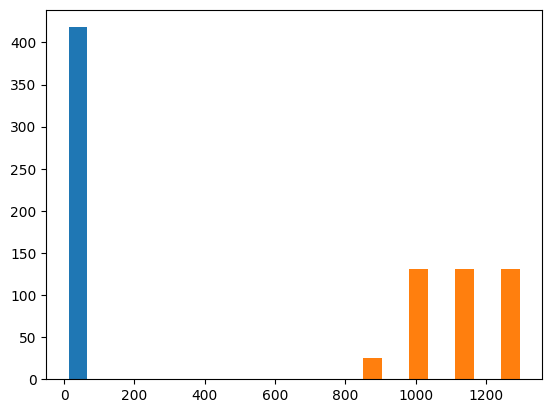

In [27]:
plt.hist(titanic[['Survived','PassengerId']])

(array([[418.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  25., 131., 131., 131.]]),
 array([   0. ,  130.9,  261.8,  392.7,  523.6,  654.5,  785.4,  916.3,
        1047.2, 1178.1, 1309. ]),
 <a list of 2 BarContainer objects>)

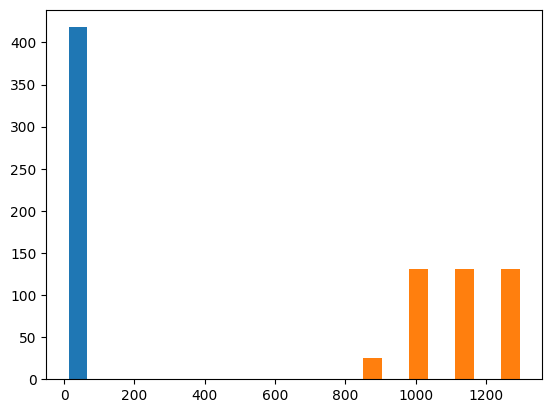

In [28]:
plt.hist(titanic[['Survived','PassengerId']])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3b4a9c41c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3b4a9c5fc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3b4a9c7b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b4a9c7460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b4a9c7e50>],
 'means': []}

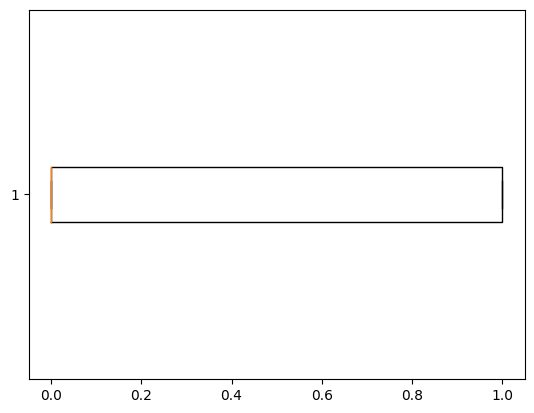

In [29]:
plt.boxplot(titanic['Survived'], vert=False)

In [30]:
titanic['Survived'].describe()

count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [31]:
for col in titanic.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(titanic[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
['Kelly, Mr. James' 'Wilkes, Mrs. James (Ellen Needs)'
 'Myles, Mr. Thomas Francis' 'Wirz, Mr. Albert'
 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)'
 'Svensson, Mr. Johan Cervin' 'Connolly, Miss. Kate'
 'Caldwell, Mr. Albert Francis'
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)' 'Davies, Mr. John Samuel'
 'Ilieff, Mr. Ylio' 'Jones, Mr. Charles Cresson'
 'Snyder, Mrs. John Pillsbury (Nelle Stevenson)' 'Howard, Mr. Benjamin'
 'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)'
 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)' 'Keane, Mr. Daniel'
 'Assaf, Mr. Gerios' 'Ilmakangas, Miss. Ida Livija'
 'Assaf Khalil, Mrs. Mariana (Miriam")"' 'Rothschild, Mr. Martin'
 'Olsen, Master. Artur Karl' 'Flegenheim, Mrs. Alfred (Antoinette)'
 'Williams, Mr. Richard Norris II'
 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)'
 'Robins, Mr. Alexander A' 'Ostby, Miss. Helene Ragnhild'
 'Daher, Mr. Shedid' 'Brady, Mr. John Bertram' 'Samaan, Mr. Elias'
 'Louch, Mr. Charles Alexa

In [32]:
# Creating a new feature of title from name column based on the pattern found above

titanic['Title'] = titanic['Name'].str.extract(r',\s(.*?)\.')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Dona', 'Mrs')
titanic['Title'] = titanic['Title'].replace(['Col', 'Rev', 'Dr'], 'Rare')

In [33]:
# Creating additional features: 'Age_Group' and 'Family'
bins = [-np.inf, 17, 32, 45, 50, np.inf]
labels = ["Children", "Young", "Mid-Aged", "Senior-Adult", 'Elderly']
titanic['Age_Group'] = pd.cut(titanic['Age'], bins=bins, labels=labels)

# Generting another new feature of family size
titanic['Family'] = titanic['SibSp'] + titanic['Parch']

# Dropping non-essential columns
titanic = titanic.drop(columns=['Name', 'Ticket'])
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_Group,Family
0,892,0,3,male,34.5,0,0,7.8292,NaN,Q,Mr,Mid-Aged,0
1,893,1,3,female,47.0,1,0,7.0000,NaN,S,Mrs,Senior-Adult,1
2,894,0,2,male,62.0,0,0,9.6875,NaN,Q,Mr,Elderly,0
3,895,0,3,male,27.0,0,0,8.6625,NaN,S,Mr,Young,0
4,896,1,3,female,22.0,1,1,12.2875,NaN,S,Mrs,Young,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,8.0500,NaN,S,Mr,NaN,0
414,1306,1,1,female,39.0,0,0,108.9000,C105,C,Mrs,Mid-Aged,0
415,1307,0,3,male,38.5,0,0,7.2500,NaN,S,Mr,Mid-Aged,0
416,1308,0,3,male,NaN,0,0,8.0500,NaN,S,Mr,NaN,0


In [34]:
# Chaning the positon of columns to place them right after their parent column

col_to_move = titanic.pop('Age_Group')
titanic.insert(4, 'Age_Group', col_to_move)

col_to_move = titanic.pop('Family')
titanic.insert(7, 'Family', col_to_move)

titanic['Age_Group'] = titanic['Age_Group'].astype('object')

In [35]:
titanic.describe(include = 'O')

,Sex,Age_Group,Cabin,Embarked,Title
count,418,332,91,418,418
unique,2,5,76,3,5
top,male,Young,B57 B59 B63 B66,S,Mr
freq,266,171,3,270,240


In [37]:
titanic.groupby('Sex')[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Family', 'Fare']].mean()

,Survived,Pclass,Age,SibSp,Parch,Family,Fare
Sex,,,,,,,
female,1.0,2.144737,30.272362,0.565789,0.598684,1.164474,49.747699
male,0.0,2.334586,30.272732,0.379699,0.274436,0.654135,27.527877


In [38]:
titanic.groupby('Embarked')[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Family', 'Fare']].mean()

,Survived,Pclass,Age,SibSp,Parch,Family,Fare
Embarked,,,,,,,
C,0.392157,1.794118,34.737805,0.421569,0.382353,0.803922,66.259765
Q,0.521739,2.869565,29.318182,0.195652,0.021739,0.217391,10.957700
S,0.325926,2.340741,28.758772,0.500000,0.459259,0.959259,28.230436


In [39]:
import plotly.express as px

# Assuming titanic is your DataFrame
survived_counts = titanic['Survived'].value_counts()

fig_surv_perc = px.pie(
    titanic,
    names=survived_counts.index,
    values=survived_counts.values,
    title='Distribution of Survived',
    hole=0.2,
    color_discrete_sequence=px.colors.sequential.Plasma  # Change the color sequence
)

fig_surv_perc.update_traces(textinfo='percent+label')
fig_surv_perc.update_layout(
    legend_title_text='Categories:',
    legend=dict(orientation="h", yanchor="bottom", y=1.02)
)
fig_surv_perc.show()

In [40]:
pclass_counts = titanic.Pclass.value_counts()

fig_pclass_perc = px.pie(titanic,
                         names= pclass_counts.index,
                         values = pclass_counts.values,
                         title=f'Distribution of Pclass',
                         hole=0.2,
                         color_discrete_sequence=px.colors.sequential.Plasma)

fig_pclass_perc.update_traces(textinfo='percent+label')
fig_pclass_perc.update_layout(legend_title_text='Categories:', legend=dict(orientation="h", yanchor="bottom", y=1.02))
fig_pclass_perc.show()


In [41]:
fig_sex_count = px.histogram(titanic,
                             x = 'Sex',
                             color = 'Sex',
                             color_discrete_sequence=px.colors.sequential.Plasma)

fig_sex_count.update_layout(title_text='Count of different Sex',
                            xaxis_title='Sex',
                            yaxis_title='Count',
                            plot_bgcolor = 'lightgreen')

fig_sex_count.show()

fig_sex_perc = px.pie(titanic,
                      names= 'Sex',
                      title=f'Distribution of Sex',
                      hole=0.2,
                      color_discrete_sequence=px.colors.sequential.Plasma)

fig_sex_perc.update_traces(textinfo='percent+label')
fig_sex_perc.update_layout(legend_title_text='Categories:',
                           legend=dict(orientation="h", yanchor="bottom", y=1.02)
                          )
fig_sex_perc.show()


In [42]:
fig_age = px.histogram(titanic, x='Age', nbins=30, histnorm='probability density')

fig_age.update_traces(marker=dict(color='#440154'), selector=dict(type='histogram'))

fig_age.update_layout(title='Distribution of Age',
                      title_x=0.5, title_pad=dict(t=20),
                      title_font=dict(size=20),
                      xaxis_title='Age',
                      yaxis_title='Probability Density',
                      xaxis=dict(showgrid=False),
                      yaxis=dict(showgrid=False),
                      bargap=0.02,
                      plot_bgcolor = 'red')
fig_age.show()

In [43]:
fig_fare = px.histogram(titanic, x='Fare', nbins=30, histnorm='probability density')

fig_fare.update_traces(marker=dict(color='#440154'), selector=dict(type='histogram'))

fig_fare.update_layout(title='Distribution of Fare',
                       title_x=0.5,
                       title_pad=dict(t=20),
                       title_font=dict(size=20),
                       xaxis_title='Fare',
                       yaxis_title='Probability Density',
                       xaxis=dict(showgrid=False),
                       yaxis=dict(showgrid=False),
                       bargap=0.02,
                       plot_bgcolor = 'lightblue')
fig_fare.show()


In [44]:
fig_embarked_count = px.histogram(titanic,
                                  x = 'Embarked',
                                  color = 'Embarked',
                                  color_discrete_sequence=px.colors.sequential.Viridis)

fig_embarked_count.update_layout(title_text='Count of different Embarked',
                                 xaxis_title='Embarked',
                                 yaxis_title='Count',
                                 plot_bgcolor = 'brown')
fig_embarked_count.show()

fig_embarked_perc = px.pie(titanic,
                           names= 'Embarked',
                           title=f'Distribution of Embarked',
                           hole=0.2,
                           color_discrete_sequence = px.colors.sequential.Viridis)

fig_embarked_perc.update_traces(textinfo='percent+label')

fig_embarked_perc.update_layout(legend_title_text='Categories:',
                                legend = dict(orientation="h", yanchor="bottom", y=1.02))
fig_embarked_perc.show()


In [45]:
fig_title_count = px.histogram(titanic,
                               x = 'Title',
                               color = 'Title',
                               color_discrete_sequence=px.colors.sequential.Viridis)

fig_title_count.update_layout(title_text='Count of different Title',
                              xaxis_title='Title',
                              yaxis_title='Count',
                              plot_bgcolor = 'lightyellow')
fig_title_count.show()

fig_title_perc = px.pie(titanic,
                        names= 'Title',
                        title=f'Distribution of Title',
                        hole=0.2,
                        color_discrete_sequence=px.colors.sequential.Viridis)

fig_title_perc.update_traces(textinfo='percent+label')
fig_title_perc.update_layout(legend_title_text='Categories:',
                             legend=dict(orientation="h", yanchor="bottom", y=1.02))
fig_title_perc.show()


In [48]:
fig_pclass_surv = px.histogram(titanic,
                               x = 'Pclass',
                               barmode = 'group',
                               color = 'Survived',
                               color_discrete_sequence = px.colors.sequential.Viridis)

fig_pclass_surv.update_layout(title = 'Survival according to passenger classes',
                              plot_bgcolor = 'skyblue')
fig_pclass_surv.show()

In [50]:
fig_pclass_surv = px.histogram(titanic,
                               x = 'Sex',
                               barmode = 'group',
                               color = 'Survived',
                               color_discrete_sequence=px.colors.sequential.Viridis)

fig_pclass_surv.update_layout(title = 'Survival according to gender',
                              plot_bgcolor = 'lightyellow')
fig_pclass_surv.show()


In [51]:
fig_embarked_surv = px.histogram(titanic,
                                 x = 'Age_Group',
                                 barmode = 'group',
                                 color = 'Survived',
                                 color_discrete_sequence=px.colors.sequential.Viridis)

fig_embarked_surv.update_layout(title = 'Survival according to age groups',
                                plot_bgcolor = 'pink')
fig_embarked_surv.show()

In [52]:
fig_family_surv = px.histogram(titanic,
                               x = 'Family',
                               barmode = 'group',
                               color = 'Survived',
                               color_discrete_sequence=px.colors.sequential.Viridis)

fig_family_surv.update_layout(title = 'Survival according to number of family members',
                              plot_bgcolor = 'darksalmon')
fig_family_surv.show()

In [53]:
fig_embarked_surv = px.histogram(titanic,
                                 x = 'Embarked',
                                 barmode = 'group',
                                 color = 'Survived',
                                 color_discrete_sequence=px.colors.sequential.Viridis)

fig_embarked_surv.update_layout(title = 'Survival according to embarked',
                                plot_bgcolor = 'olive')
fig_embarked_surv.show()

In [54]:
grouped_data = titanic.groupby(['Age', 'Sex', 'Survived']).agg({'Fare': 'mean'}).reset_index()

fig = px.line(grouped_data,
              x='Age',
              y='Fare',
              color='Survived',
              facet_col='Sex',
              facet_col_wrap=2,
              labels={'Fare': 'Fare', 'Survived': 'Survived'},
              title='12. Relation of age and gender with fare')

fig.update_layout(hovermode='x unified', plot_bgcolor = 'aqua')
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Fair', row=1, col=1)
fig.show()


In [56]:
le = LabelEncoder()
cols = ['Sex', 'Age_Group', 'Cabin', 'Embarked', 'Title']

for col in cols:
    titanic[col] = le.fit_transform(titanic[col])

In [57]:
titanic.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [58]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [59]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age_Group    418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Family       418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    int64  
 11  Title        418 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 39.3 KB
None


In [60]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Survived
Non-Null Count  Dtype
--------------  -----
418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB
